In [89]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math

%pylab inline

Populating the interactive namespace from numpy and matplotlib


Using breast_cancer.csv to predict if the tumour is malignant

In [90]:
data = pd.read_csv("breast_cancer.csv")

In [91]:
data.head()

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
0,0,1000025,5,1,1,1,2,1,3,1,1,0
1,1,1002945,5,4,4,5,7,10,3,2,1,0
2,2,1015425,3,1,1,1,2,2,3,1,1,0
3,3,1016277,6,8,8,1,3,4,3,7,1,0
4,4,1017023,4,1,1,3,2,1,3,1,1,0


In [92]:
data

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
0,0,1000025,5,1,1,1,2,1,3,1,1,0
1,1,1002945,5,4,4,5,7,10,3,2,1,0
2,2,1015425,3,1,1,1,2,2,3,1,1,0
3,3,1016277,6,8,8,1,3,4,3,7,1,0
4,4,1017023,4,1,1,3,2,1,3,1,1,0
5,5,1017122,8,10,10,8,7,10,9,7,1,1
6,6,1018099,1,1,1,1,2,10,3,1,1,0
7,7,1018561,2,1,2,1,2,1,3,1,1,0
8,8,1033078,2,1,1,1,2,1,1,1,5,0
9,9,1033078,4,2,1,1,2,1,2,1,1,0


In [93]:
data.columns

Index([u'Unnamed: 0', u'id number', u'clump_thickness',
       u'uniformity_of_cell_size', u'uniformity_of_cell_shape',
       u'marginal_adhesion', u'epithelial_cell_size', u'bare_nuclei',
       u'bland_chromatin', u'normal_nucleoli', u'mitoses', u'malignant'],
      dtype='object')

I will drop the columns that I don't think are needed for the model

In [94]:
data = data.drop(['Unnamed: 0','id number'], axis = 1)

We want to predict if it is malignant

In [95]:
y = data.pop("malignant")

In [96]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=.2, random_state=42)

## Grid Search

In [97]:

n_estimators = [100,200,300,400,500]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [3,5,7,9]


rfc = RandomForestClassifier(n_jobs=1)
estimator = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)
                              

In [98]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 5, 7, 9], 'max_features': ['auto', 'sqrt', 'log2'], 'n_estimators': [100, 200, 300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [99]:
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [100]:
best_rfc = estimator.best_estimator_

## Accuracy

In [101]:
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print "Accuracy: ", accuracy

Accuracy:  0.971428571429


In [102]:
y_hat = best_rfc.predict(X_test)

In [103]:
y_hat

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0], dtype=int64)

In [104]:
y_test

158    0
499    0
396    0
155    1
321    0
212    0
234    0
289    1
300    1
356    1
672    0
328    1
199    0
78     0
598    0
569    1
446    0
506    1
626    1
603    1
360    1
338    0
668    1
290    0
284    1
331    0
477    0
54     1
248    0
223    1
      ..
259    0
422    0
6      0
101    1
542    0
299    1
395    0
501    0
318    0
145    0
486    0
353    1
208    0
695    0
361    1
86     1
664    0
481    0
633    1
41     1
108    0
690    0
56     1
424    0
514    1
24     0
218    1
431    0
281    0
110    0
Name: malignant, dtype: int64

In [105]:
correct = 0
total = y_test.shape[0]
for pred_val, truth_val in zip(y_hat, y_test):
    if pred_val == truth_val:
        correct +=1

print correct / float(total)

0.971428571429


## Precision and Recall

In [106]:
print classification_report(y_test, best_rfc.predict(X_test))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98        95
          1       0.96      0.96      0.96        45

avg / total       0.97      0.97      0.97       140



Precsion:
The model will correctly identify 96% of malignant tumours. There is a 4% chance 
it will identify a non-malignant tumour as a malignant tumour.

Recall : 
Of the model identified as malignant, 96% of them actually are malignant.

In [107]:
print confusion_matrix(y_test, best_rfc.predict(X_test))

[[93  2]
 [ 2 43]]


Precision: 43/423+2 =.96
(tp / tp+fp)

Recall: 43/43+3 = .96
(tp / tp + fn)

## AUC

In [108]:
roc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print "AUC Score: ", roc

AUC Score:  0.994619883041


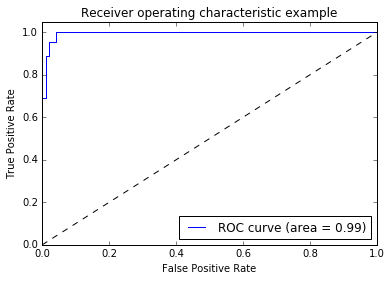

In [109]:
fpr, tpr, thresholds = roc_curve(y_test, best_rfc.predict_proba(X_test)[:,1])
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

##  K-Fold Cross Validation
Now let's use K-Fold Cross Validation method to overcome the overfitting of the 20%
holdout


In [110]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(best_rfc, data, y, cv=10)

In [111]:
scores

array([ 0.92957746,  0.97142857,  0.97142857,  0.91428571,  0.98571429,
        0.98571429,  0.97142857,  0.98571429,  0.97101449,  1.        ])

In [112]:
mean_score = scores.mean()
std_dev = scores.std()
std_error = scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)

Score is 0.968631 +/-  0.018050
95 percent probability that if this experiment were repeated over and over the average score would be between 0.950581 and 0.986680


We use k-fold Cross Validation when the dataset we have is huge and our train set becomes very less in small data sets. 
The mean score is 0.968631. 

As far as AUC is concerned , we have a high score of 0.994619883041 which is very good. 

Precision : 0.96
Recall : 0.96 

Accuracy : 0.971428571429